In [35]:
import pandas as pd
import nltk
import sklearn
import matplotlib.pyplot as plt

In [5]:
# Import data
df = pd.read_csv('spam.csv', encoding='latin-1')

# examine
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Drop extra columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns
df = df.rename({'v1': 'label', 'v2': 'text'}, axis=1)

df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Create target column and assign values to ham and spam
df['target'] = df.label.map({'ham': 0, 'spam': 1})
df.head()

,label,text,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
# Class balance.  We have 747 spam messages which accounts for 13.4% of the data set.
print(df.target.value_counts())
df.target.mean()

0    4825
1     747
Name: target, dtype: int64


0.13406317300789664

In [9]:
# Split data into training (70%) and testing (30%) data sets.  Maintain class balance in each split.
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.target, test_size=0.30, stratify=df.target, random_state=42)

In [11]:
print(y_train.value_counts())
print(y_test.value_counts())

0    3377
1     523
Name: target, dtype: int64
0    1448
1     224
Name: target, dtype: int64


In [12]:
y_train.describe()

count    3900.000000
mean        0.134103
std         0.340806
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target, dtype: float64

In [13]:
y_test.describe()

count    1672.000000
mean        0.133971
std         0.340723
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target, dtype: float64

In [14]:
x_train.head()

4912    Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ...
2541      I dont. Can you send it to me. Plus how's mode.
5323                           Aah bless! How's your arm?
5171                         Oh k. . I will come tomorrow
2532                                            Yup ok...
Name: text, dtype: object

In [15]:
# Visualize in word cloud
ham_words = ''
spam_words = ''

ham = df[df.target == 0]
spam = df[df.target == 1]

In [16]:
# Create empty list to store ham words
ham_words = []

# Tokenize each text entry
for row in ham.text:
    text = row.lower()
    tokens = nltk.word_tokenize(text)
    
    # Add each word to list
    for word in tokens:
        ham_words.append(word)

# Repeat for spam words        
spam_words = []

for row in spam.text:
    text = row.lower()
    tokens = nltk.word_tokenize(text)
    
    # Add each word to list
    for word in tokens:
        spam_words.append(word)

In [20]:
# Length of word lists
print(len(ham_words))
print(len(spam_words))

82293
20603


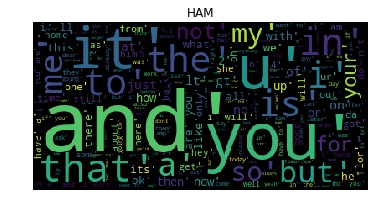

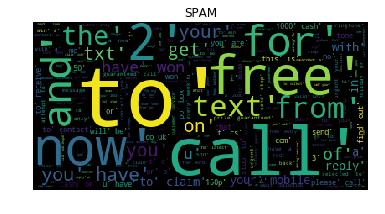

In [32]:
# Import word cloud
from wordcloud import WordCloud

ham_wordcloud = WordCloud(max_font_size=100).generate(str(ham_words))
plt.figure()
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.title('HAM')

spam_wordcloud = WordCloud(max_font_size=100).generate(str(spam_words))
plt.figure()
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.title('SPAM')
plt.show()

# Stop words dominate.  Repeat tokenization and word cloud generation with stopwords removed.

In [39]:
# Import stopwords
from nltk.corpus import stopwords

# Send to list
stopwords = list(stopwords.words('english'))

In [53]:
# Redo steps from above with added step of removing stop words

# Create empty list to store shortend list of ham words
ham_words_short = []

# Tokenize each text entry
for row in ham.text:
    text = row.lower()
    tokens = nltk.word_tokenize(text)
    
    # Add each word to list, filtering out stopwords
    for word in tokens:
        if word not in stopwords:
            ham_words_short.append(word)

# Repeat for spam words        
spam_words_short= []

for row in spam.text:
    text = row.lower()
    tokens = nltk.word_tokenize(text)
    
    # Add each word to list
    for word in tokens:
        if word not in stopwords:
            spam_words_short.append(word)

In [54]:
# New lengths are much shorter now 
print(len(ham_words_short))
print(len(spam_words_short))

53283
15432


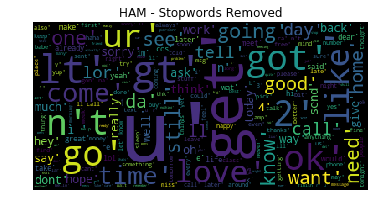

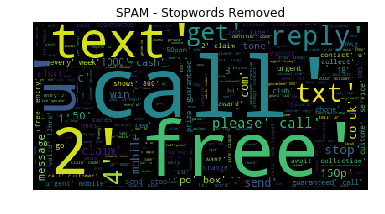

In [57]:
# Regenerate word clouds
ham_wordcloud_short = WordCloud(max_font_size=100).generate(str(ham_words_short))
plt.figure()
plt.imshow(ham_wordcloud_short)
plt.axis('off')
plt.title('HAM - Stopwords Removed')

spam_wordcloud_short = WordCloud(max_font_size=100).generate(str(spam_words_short))
plt.figure()
plt.imshow(spam_wordcloud_short)
plt.axis('off')
plt.title('SPAM - Stopwords Removed')
plt.show()

In [30]:
# Tokenize and count
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
count_vec = CountVectorizer(ngram_range=(1, 4), 
                            stop_words='english',
                            lowercase=True
                           )

train_vec = count_vec.fit_transform(x_train)
test_vec = count_vec.fit_transform(x_test)

In [43]:
print('Train shape: ',train_vec.shape)
print('Test shape: ', test_vec.shape)
print(type(train_vec))

Train shape:  (3900, 66783)
Test shape:  (1672, 32496)
<class 'scipy.sparse.csr.csr_matrix'>
